In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from google.colab import drive, files
import io

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_without_label.csv') ##Este no es el test que se usa para entrenar.

# 1. Análisis de datos


In [4]:
train.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [13]:
train.info

<bound method DataFrame.info of         id                                              tweet label
0        1  Chinese converting to Islam after realising th...  fake
1        2  11 out of 13 people (from the Diamond Princess...  fake
2        3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3        4  Mike Pence in RNC speech praises Donald Trump’...  fake
4        5  6/10 Sky's @EdConwaySky explains the latest #C...  real
...    ...                                                ...   ...
8555  8556  A tiger tested positive for COVID-19 please st...  fake
8556  8557  ???Autopsies prove that COVID-19 is??� a blood...  fake
8557  8558  _A post claims a COVID-19 vaccine has already ...  fake
8558  8559  Aamir Khan Donate 250 Cr. In PM Relief Cares Fund  fake
8559  8560  It has been 93 days since the last case of COV...  real

[8560 rows x 3 columns]>

In [ ]:
##confirmar nulos train.isnull().mean()

## Transformamos los datos en String:

In [ ]:
train['id'] = train['id'].astype(str)
train['tweet'] = train['tweet'].astype(str)
train['label'] = train['label'].astype(str)
##train['short_description'] = train['short_description'].astype(str)

## Información interesante del df:

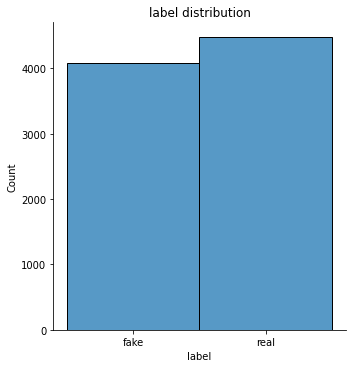

In [12]:
sns.displot(train["label"]);
plt.title("label distribution");

In [ ]:
##Si pandas_profiling funciona mal:
##!pip install pandas-profiling==2.7.1
##!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train)

profile

### Sacamos el Id reptido


In [17]:
train.drop(['id'], axis=1)
train.set_index("id", inplace = True)

In [41]:
train

,tweet,label
id,,
1,Chinese converting to Islam after realising th...,fake
2,11 out of 13 people (from the Diamond Princess...,fake
3,"COVID-19 Is Caused By A Bacterium, Not Virus A...",fake
4,Mike Pence in RNC speech praises Donald Trump’...,fake
5,6/10 Sky's @EdConwaySky explains the latest #C...,real
...,...,...
8556,A tiger tested positive for COVID-19 please st...,fake
8557,???Autopsies prove that COVID-19 is??� a blood...,fake
8558,_A post claims a COVID-19 vaccine has already ...,fake


In [42]:
## Agregar columnas y sacar largo de string
##train['Tweet lenght'] = train["tweet"].str.len()
##train.columns.append("Length", int);

# 2. Train y Validation

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    train.drop('label', axis=1),
    train['label'],
    test_size=(1.0/3), random_state=42)

print(f'X_Data shape = {train.shape}')
print(f'X_train shape = {X_train.shape}\n{X_train.head()}\n------------------------')
print(f'Y_train shape = {Y_train.shape}\n{Y_train.head()}\n------------------------')
print(f'X_test shape = {X_test.shape}\n{X_test.head()}\n------------------------')
print(f'Y_test shape = {Y_test.shape}\n{Y_test.head()}')

X_Data shape = (8560, 2)
X_train shape = (5706, 1)
                                                  tweet
id                                                     
5685  #IndiaFightsCorona: 📍Guidelines for phased re-...
2927  @ImDanThompson No. This is exactly how it was ...
5900  Jenny McCarthy Develops Covid-19 Vaccine https...
6670  RT @WHO: Airborne #COVID19 transmission can oc...
1936  Officials release edited coronavirus reopening...
------------------------
Y_train shape = (5706,)
id
5685    real
2927    fake
5900    fake
6670    real
1936    fake
Name: label, dtype: object
------------------------
X_test shape = (2854, 1)
                                                  tweet
id                                                     
6365  Since then the large number of meatpacking out...
4410  Help stop the domino chain of #COVID19 infecti...
4396  @ImTheRealDMac @lowerthetemp In some places it...
8495  Our daily update is published. We’ve now track...
2606  Seen those pictures o

In [ ]:
#https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/



##skf= StratifiedKFold(5, shuffle=true,random_state=1)
##cross_val_score(clf,x_clf,y_clf,cv=skf,scoring='accuracy')

# 3. Preprocesamiento básico